# K Nearest Neighbours -- Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
cdata = pd.read_csv("Data/Classified Data", index_col = 0)

In [4]:
cdata.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Standardize the variables

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(cdata.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_features = scaler.transform(cdata.drop('TARGET CLASS', axis=1))

In [9]:
cdata_features = pd.DataFrame(scaled_features, columns=cdata.columns[:-1])

In [10]:
cdata_features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Tain-Test-Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,cdata['TARGET CLASS'],test_size=0.30)

### Using KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [16]:
pred = knn.predict(X_test)

### Predictions & Evaluations

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(confusion_matrix(y_test, pred))

[[143  16]
 [  9 132]]


In [19]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       159
           1       0.89      0.94      0.91       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



### Choosing the optimum K value

In [20]:
error_rate =[]

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


### Plot error_rate

Text(0, 0.5, 'Error Rate')

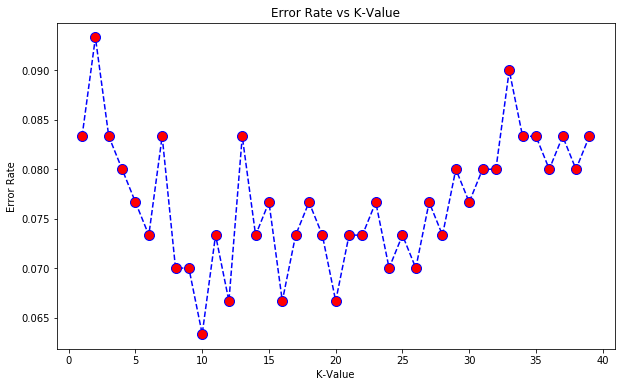

In [21]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle = 'dashed', marker='o', 
         markerfacecolor='red',markersize=10)
plt.title("Error Rate vs K-Value")
plt.xlabel("K-Value")
plt.ylabel("Error Rate")

In [22]:
# TODO : K-value snd correspeonding error_rate
for i, error_i in enumerate(error_rate):
    print([i, error_i])

[0, 0.08333333333333333]
[1, 0.09333333333333334]
[2, 0.08333333333333333]
[3, 0.08]
[4, 0.07666666666666666]
[5, 0.07333333333333333]
[6, 0.08333333333333333]
[7, 0.07]
[8, 0.07]
[9, 0.06333333333333334]
[10, 0.07333333333333333]
[11, 0.06666666666666667]
[12, 0.08333333333333333]
[13, 0.07333333333333333]
[14, 0.07666666666666666]
[15, 0.06666666666666667]
[16, 0.07333333333333333]
[17, 0.07666666666666666]
[18, 0.07333333333333333]
[19, 0.06666666666666667]
[20, 0.07333333333333333]
[21, 0.07333333333333333]
[22, 0.07666666666666666]
[23, 0.07]
[24, 0.07333333333333333]
[25, 0.07]
[26, 0.07666666666666666]
[27, 0.07333333333333333]
[28, 0.08]
[29, 0.07666666666666666]
[30, 0.08]
[31, 0.08]
[32, 0.09]
[33, 0.08333333333333333]
[34, 0.08333333333333333]
[35, 0.08]
[36, 0.08333333333333333]
[37, 0.08]
[38, 0.08333333333333333]


- When 34 < K < 38, the error rate is around 0.043. Let's retrain the model with K = 36

In [23]:
# Retrain the model with K=36
knn = KNeighborsClassifier(n_neighbors=36)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=36')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=36


[[143  16]
 [  8 133]]


              precision    recall  f1-score   support

           0       0.95      0.90      0.92       159
           1       0.89      0.94      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



- Awesome!